In [55]:
# 📌 Schritt 1: Google Drive einbinden
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
#Basis-Pfad zur Datenstruktur setzen
BASE_PATH = '/content/drive/MyDrive/Time-Series-Modeling-Project/retail_kaggle_data_raw'


In [57]:
#p7zip installieren (einmal pro Colab-Session)
!apt-get install -y p7zip-full


shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [58]:
#Entpacken der .7z-Dateien – nur wenn CSV noch nicht existiert
import os

#Liste der zu entpackenden Dateien
data_files = ['train.csv', 'stores.csv', 'items.csv', 'transactions.csv', 'oil.csv', 'holidays_events.csv', 'test.csv']

for file in data_files:
    file_path = f"{BASE_PATH}/{file}"
    compressed_path = file_path + ".7z"
    if not os.path.exists(file_path):
        print(f"Entpacke {file}...")
        !7z e "{compressed_path}" -o"{BASE_PATH}" -y
    else:
        print(f"Bereits vorhanden: {file}")


Bereits vorhanden: train.csv
Bereits vorhanden: stores.csv
Bereits vorhanden: items.csv
Bereits vorhanden: transactions.csv
Bereits vorhanden: oil.csv
Bereits vorhanden: holidays_events.csv
Bereits vorhanden: test.csv


**Größe aller entpackten CSV-Dateien anzeigen**

In [59]:
import os

# Liste der CSV-Dateien im Ordner
csv_files = [
    'train.csv',
    'test.csv',
    'stores.csv',
    'items.csv',
    'transactions.csv',
    'oil.csv',
    'holidays_events.csv'
]

print("Übersicht der Dateigrößen (in MB):\n")

for file in csv_files:
    file_path = os.path.join(BASE_PATH, file)
    if os.path.exists(file_path):
        size_mb = os.path.getsize(file_path) / (1024 * 1024)
        print(f"{file:<25} {size_mb:.2f} MB")
    else:
        print(f"{file:<25} Nicht gefunden")


Übersicht der Dateigrößen (in MB):

train.csv                 4765.94 MB
test.csv                  120.32 MB
stores.csv                0.00 MB
items.csv                 0.10 MB
transactions.csv          1.48 MB
oil.csv                   0.02 MB
holidays_events.csv       0.02 MB


**Struktur-Check: Kleine Dateien verstehen**

In [60]:
import pandas as pd
import os


#CSV-Dateien laden
df_stores = pd.read_csv(f"{BASE_PATH}/stores.csv")
df_items = pd.read_csv(f"{BASE_PATH}/items.csv")
df_transactions = pd.read_csv(f"{BASE_PATH}/transactions.csv")
df_oil = pd.read_csv(f"{BASE_PATH}/oil.csv")
df_holidays = pd.read_csv(f"{BASE_PATH}/holidays_events.csv")

print("Alle kleinen Datensätze erfolgreich geladen.")


Alle kleinen Datensätze erfolgreich geladen.


In [61]:
#stores.csv
print("stores.csv")
print(df_stores.info())
display(df_stores.head())

#items.csv
print("items.csv")
print(df_items.info())
display(df_items.head())

#transactions.csv
print("transactions.csv")
print(df_transactions.info())
display(df_transactions.head())

#oil.csv
print("oil.csv")
print(df_oil.info())
display(df_oil.head())

#holidays_events.csv
print("holidays_events.csv")
print(df_holidays.info())
display(df_holidays.head())


stores.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB
None


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


items.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_nbr    4100 non-null   int64 
 1   family      4100 non-null   object
 2   class       4100 non-null   int64 
 3   perishable  4100 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 128.3+ KB
None


,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


transactions.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB
None


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


oil.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
None


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


holidays_events.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB
None


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


**Zeilenanzahl der kleineren Datensätze**

In [62]:
#Zeilenanzahl der kleineren CSV-Dateien anzeigen
import os

datasets = {
    "test.csv": "test.csv",
    "stores.csv": "stores.csv",
    "items.csv": "items.csv",
    "transactions.csv": "transactions.csv",
    "oil.csv": "oil.csv",
    "holidays_events.csv": "holidays_events.csv"
}

print("Zeilenanzahl der kleineren Datensätze:\n")

for name, file in datasets.items():
    path = os.path.join(BASE_PATH, file)
    if os.path.exists(path):
        try:
            n_rows = sum(1 for _ in open(path)) - 1  # minus header
            print(f"{name:<25} {n_rows} Zeilen")
        except Exception as e:
            print(f"{name:<25} Fehler beim Lesen: {e}")
    else:
        print(f"{name:<25} Datei nicht gefunden")


Zeilenanzahl der kleineren Datensätze:

test.csv                  3370464 Zeilen
stores.csv                54 Zeilen
items.csv                 4100 Zeilen
transactions.csv          83488 Zeilen
oil.csv                   1218 Zeilen
holidays_events.csv       350 Zeilen


**Speicherfreundliches Laden von train.csv in Chunks -\ Orientierung an test.csv als größtem vollständig ladbarem Datensatz**

**Ersten 5 Zeilen von train.csv laden**

In [63]:
#Nur 5 Zeilen laden
train_preview = pd.read_csv(f"{BASE_PATH}/train.csv", nrows=5)

#Struktur anzeigen
print("Struktur von train.csv (5 Zeilen Vorschau):")
print(train_preview.info())
display(train_preview)

Struktur von train.csv (5 Zeilen Vorschau):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           5 non-null      int64  
 1   date         5 non-null      object 
 2   store_nbr    5 non-null      int64  
 3   item_nbr     5 non-null      int64  
 4   unit_sales   5 non-null      float64
 5   onpromotion  0 non-null      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 372.0+ bytes
None


,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


**Speicherfreundliches Laden von train.csv in Chunks -\ Orientierung an test.csv als größtem vollständig ladbarem Datensatz**

**Berechnung: Anzahl Chunks**

In [64]:
import math

# Größe von train.csv in MB (aus vorheriger Analyse)
train_size_mb = 4765.94

# Zielgröße pro Chunk (in MB), orientiert an test.csv
target_chunk_mb = 120

# Berechnung der geschätzten Chunk-Anzahl
estimated_chunks = math.ceil(train_size_mb / target_chunk_mb)

print(f"📦 Erwartete Anzahl an Chunks (bei {target_chunk_mb} MB): {estimated_chunks}")


📦 Erwartete Anzahl an Chunks (bei 120 MB): 40


**train.csv in 3 Mioer-Chunks einlesen & Guayas filtern**

In [65]:
import pandas as pd
import os

#Schritt 1: Guayas-Stores holen
guayas_store_ids = df_stores[df_stores['state'] == 'Guayas']['store_nbr'].unique()
print(f"Guayas-Stores gefunden: {len(guayas_store_ids)}")

#Schritt 2: Pfade & Einstellungen
chunk_size = 3_000_000
train_path = f"{BASE_PATH}/train.csv"
output_path = f"{BASE_PATH}/train_guayas_only.csv"

#NEU: Existenz-Check
if os.path.exists(output_path):
    print("Gefilterte Datei existiert bereits – Chunking wird übersprungen.")
else:
    print("Datei existiert nicht – starte Chunk-Verarbeitung...")

    # Nur falls die Datei nicht existiert, Chunks erzeugen
    first_chunk = True
    for i, chunk in enumerate(pd.read_csv(train_path, chunksize=chunk_size)):
        guayas_chunk = chunk[chunk['store_nbr'].isin(guayas_store_ids)]

        if not guayas_chunk.empty:
            guayas_chunk.to_csv(output_path, mode='a', index=False, header=first_chunk)
            print(f"Chunk {i+1}: {guayas_chunk.shape[0]:,} Guayas-Zeilen gespeichert.")
            first_chunk = False
        else:
            print(f"➖ Chunk {i+1}: keine Guayas-Daten enthalten.")

    print("Verarbeitung abgeschlossen.")
    print(f"Datei gespeichert unter:\n{output_path}")

Guayas-Stores gefunden: 11
Gefilterte Datei existiert bereits – Chunking wird übersprungen.


**EDA - Teil 1: Daten laden & erste Einblicke**

In [66]:
#Nur 500.000 Zeilen laden – zum Testen
df_guayas = pd.read_csv(
    f"{BASE_PATH}/train_guayas_only.csv",
    dtype={
        "id": "int32",
        "store_nbr": "int16",
        "item_nbr": "int32",
        "unit_sales": "float32",
        "onpromotion": "object"
    },
    parse_dates=["date"],
    low_memory=False,
    nrows=500_000  #kleiner Teil für schnelles Debugging
)

**Strukturübersicht aller Datensätze**

In [67]:
#Zusatzdaten laden
print("Lade Zusatzdatensätze...")

df_items = pd.read_csv(f"{BASE_PATH}/items.csv")
print("items.csv geladen:", df_items.shape)

df_stores = pd.read_csv(f"{BASE_PATH}/stores.csv")
print("stores.csv geladen:", df_stores.shape)

df_transactions = pd.read_csv(f"{BASE_PATH}/transactions.csv")
print("transactions.csv geladen:", df_transactions.shape)

df_oil = pd.read_csv(f"{BASE_PATH}/oil.csv")
print("oil.csv geladen:", df_oil.shape)

df_holidays_events = pd.read_csv(f"{BASE_PATH}/holidays_events.csv")
print("holidays_events.csv geladen:", df_holidays_events.shape)

# 🔍 Funktion zur Anzeige fehlender Werte pro Datei
def check_missing(df, name):
    print(f"\n🔍 Fehlende Werte in {name}:")
    print(df.isnull().sum())

# Alle Datensätze prüfen
check_missing(df_items, "items.csv")
check_missing(df_stores, "stores.csv")
check_missing(df_transactions, "transactions.csv")
check_missing(df_oil, "oil.csv")
check_missing(df_holidays_events, "holidays_events.csv")



Lade Zusatzdatensätze...
items.csv geladen: (4100, 4)
stores.csv geladen: (54, 5)
transactions.csv geladen: (83488, 3)
oil.csv geladen: (1218, 2)
holidays_events.csv geladen: (350, 6)

🔍 Fehlende Werte in items.csv:
item_nbr      0
family        0
class         0
perishable    0
dtype: int64

🔍 Fehlende Werte in stores.csv:
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

🔍 Fehlende Werte in transactions.csv:
date            0
store_nbr       0
transactions    0
dtype: int64

🔍 Fehlende Werte in oil.csv:
date           0
dcoilwtico    43
dtype: int64

🔍 Fehlende Werte in holidays_events.csv:
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


**Bereinigung von oil.csv**

In [68]:
#Datum korrekt formatieren
df_oil['date'] = pd.to_datetime(df_oil['date'])

#Fehlende Werte mit Forward Fill auffüllen
df_oil['dcoilwtico'] = df_oil['dcoilwtico'].fillna(method='ffill')

#Prüfen
print("Fehlende Werte nach Füllung:")
print(df_oil.isnull().sum())


Fehlende Werte nach Füllung:
date          0
dcoilwtico    1
dtype: int64


<ipython-input-68-01bc75a554e6>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_oil['dcoilwtico'] = df_oil['dcoilwtico'].fillna(method='ffill')


**oil.csv: clean + future-proof**

In [69]:
df_oil = df_oil.copy()

# Erstes Forward Fill
df_oil['dcoilwtico'] = df_oil['dcoilwtico'].ffill()

# Falls die erste Zeile leer war → jetzt mit Backward Fill ergänzen
df_oil['dcoilwtico'] = df_oil['dcoilwtico'].bfill()

# Finaler Check
print("Fehlende Werte nach kompletter Füllung:")
print(df_oil.isnull().sum())


Fehlende Werte nach kompletter Füllung:
date          0
dcoilwtico    0
dtype: int64


**Strukturübersicht train_guayas_only.csv**

In [70]:
df_guayas_preview = pd.read_csv(f"{BASE_PATH}/train_guayas_only.csv", nrows=1_000_000)
print("Vorschau geladen – 1 Million Zeilen")
print(df_guayas_preview.info())
display(df_guayas_preview.head())


Vorschau geladen – 1 Million Zeilen
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1000000 non-null  int64  
 1   date         1000000 non-null  object 
 2   store_nbr    1000000 non-null  int64  
 3   item_nbr     1000000 non-null  int64  
 4   unit_sales   1000000 non-null  float64
 5   onpromotion  0 non-null        float64
dtypes: float64(2), int64(3), object(1)
memory usage: 45.8+ MB
None


,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,18789,2013-01-02,24,103665,6.0,NaN
1,18790,2013-01-02,24,105574,12.0,NaN
2,18791,2013-01-02,24,105575,2.0,NaN
3,18792,2013-01-02,24,105577,1.0,NaN
4,18793,2013-01-02,24,105693,7.0,NaN


**train_guayas_only.csv: onpromotion sauber umwandeln**

In [71]:
df_guayas = df_guayas.copy()

# 'onpromotion' bereinigen & in Boolean umwandeln
df_guayas['onpromotion'] = df_guayas['onpromotion'].fillna(False)
df_guayas['onpromotion'] = df_guayas['onpromotion'].astype(bool)

# Prüfen
print("Datentyp nach Umwandlung:", df_guayas['onpromotion'].dtype)


Datentyp nach Umwandlung: bool


<ipython-input-71-d5aeff101476>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_guayas['onpromotion'] = df_guayas['onpromotion'].fillna(False)


**train_guayas_only.csv: Fehlende Werte prüfen**

In [72]:
#Fehlende Werte zählen
print("Fehlende Werte pro Spalte:")
print(df_guayas.isnull().sum())


Fehlende Werte pro Spalte:
id             0
date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
dtype: int64


**Alle Datensets: Zeitstempel vorbereiten**

In [73]:
#Alle relevanten 'date'-Spalten als datetime formatieren

df_guayas['date'] = pd.to_datetime(df_guayas['date'])
df_transactions['date'] = pd.to_datetime(df_transactions['date'])
df_oil['date'] = pd.to_datetime(df_oil['date'])
df_holidays_events['date'] = pd.to_datetime(df_holidays_events['date'])


**Schnellcheck**

In [74]:
#Datentypen prüfen
print("\nDatentypen:")
print("df_guayas['date']:", df_guayas['date'].dtype)
print("df_transactions['date']:", df_transactions['date'].dtype)
print("df_oil['date']:", df_oil['date'].dtype)
print("df_holidays_events['date']:", df_holidays_events['date'].dtype)

#Fehlende Werte in df_guayas
print("\nFehlende Werte in df_guayas:")
print(df_guayas.isnull().sum())

#Datentyp-Kontrolle onpromotion & unit_sales
print("\nDatentypen df_guayas:")
print(df_guayas.dtypes)

#df_oil: Check auf verbleibende NaNs
print("\nFehlende Werte in df_oil:")
print(df_oil.isnull().sum())

#Strukturcheck (Zeilen + Spalten)
print("\nShapes:")
print("df_guayas:", df_guayas.shape)
print("df_items:", df_items.shape)
print("df_stores:", df_stores.shape)
print("df_transactions:", df_transactions.shape)
print("df_oil:", df_oil.shape)
print("df_holidays_events:", df_holidays_events.shape)



Datentypen:
df_guayas['date']: datetime64[ns]
df_transactions['date']: datetime64[ns]
df_oil['date']: datetime64[ns]
df_holidays_events['date']: datetime64[ns]

Fehlende Werte in df_guayas:
id             0
date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
dtype: int64

Datentypen df_guayas:
id                      int32
date           datetime64[ns]
store_nbr               int16
item_nbr                int32
unit_sales            float32
onpromotion              bool
dtype: object

Fehlende Werte in df_oil:
date          0
dcoilwtico    0
dtype: int64

Shapes:
df_guayas: (500000, 6)
df_items: (4100, 4)
df_stores: (54, 5)
df_transactions: (83488, 3)
df_oil: (1218, 2)
df_holidays_events: (350, 6)


**Fehlende Datumseinträge auffüllen**

In [75]:
import pandas as pd

#Datumsspanne für Guayas berechnen
full_date_range = pd.date_range(start=df_guayas['date'].min(), end=df_guayas['date'].max(), freq='D')

#Alle Kombinationen aus store_nbr, item_nbr, date erzeugen
unique_store_items = df_guayas[['store_nbr', 'item_nbr']].drop_duplicates()
full_grid = unique_store_items.assign(key=1).merge(
    pd.DataFrame({'date': full_date_range, 'key': 1}),
    on='key'
).drop('key', axis=1)

print("Kombinationen erstellt:", full_grid.shape)

#Originaldaten einfügen
df_guayas_full = full_grid.merge(
    df_guayas,
    on=['date', 'store_nbr', 'item_nbr'],
    how='left'
)

# 🧹 Fehlende Werte auffüllen
df_guayas_full['unit_sales'] = df_guayas_full['unit_sales'].fillna(0).astype('float32')
df_guayas_full['onpromotion'] = df_guayas_full['onpromotion'].fillna(False).astype(bool)

#id neu generieren (optional, da alt irrelevant)
df_guayas_full = df_guayas_full.reset_index(drop=True)
df_guayas_full['id'] = df_guayas_full.index.astype('int32')

#Ergebnis checken
print("\nNeuer Shape mit aufgefüllten Lücken:", df_guayas_full.shape)
print("Fehlende Werte danach:")
print(df_guayas_full.isnull().sum())


Kombinationen erstellt: (739900, 3)

Neuer Shape mit aufgefüllten Lücken: (739900, 6)
Fehlende Werte danach:
store_nbr      0
item_nbr       0
date           0
id             0
unit_sales     0
onpromotion    0
dtype: int64


<ipython-input-75-d8b6e6b84f23>:24: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_guayas_full['onpromotion'] = df_guayas_full['onpromotion'].fillna(False).astype(bool)


**Negative unit_sales auf 0 setzen**

In [76]:
#Anzahl negativer Werte prüfen
negative_count = (df_guayas_full['unit_sales'] < 0).sum()
print(f"Negative unit_sales gefunden: {negative_count}")

#Negative Werte durch 0 ersetzen
df_guayas_full['unit_sales'] = df_guayas_full['unit_sales'].apply(lambda x: max(x, 0))

#Kontrolle
print("Negative Werte bereinigt.")
print(f"Negativwerte nach Bereinigung: {(df_guayas_full['unit_sales'] < 0).sum()}")


Negative unit_sales gefunden: 34
Negative Werte bereinigt.
Negativwerte nach Bereinigung: 0


**Z-Score berechnen**

In [77]:
import numpy as np

# Funktion zur Berechnung des Z-Scores je Gruppe (store-item-Kombination)
def calculate_z_score(group):
    mean = group['unit_sales'].mean()
    std = group['unit_sales'].std()

    # Z-Score berechnen, mit Schutz gegen Division durch 0
    group['z_score'] = (group['unit_sales'] - mean) / (std if std != 0 else 1)
    return group

# Anwendung gruppiert nach store_nbr und item_nbr
df_guayas_full = df_guayas_full.groupby(['store_nbr', 'item_nbr'], group_keys=False).apply(calculate_z_score)

# Überblick über sehr hohe Z-Scores (> 5 Standardabweichungen)
extreme_outliers = df_guayas_full[df_guayas_full['z_score'] > 5]
print(f"Extrem hohe Z-Scores (>5): {len(extreme_outliers)} Zeilen")
display(extreme_outliers[['date', 'store_nbr', 'item_nbr', 'unit_sales', 'z_score']].head())


Extrem hohe Z-Scores (>5): 1317 Zeilen


<ipython-input-77-95ba78dc9e88>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_guayas_full = df_guayas_full.groupby(['store_nbr', 'item_nbr'], group_keys=False).apply(calculate_z_score)


,date,store_nbr,item_nbr,unit_sales,z_score
291,2013-01-13,24,105693,29.0,6.301235
1641,2013-02-02,24,115847,3.0,6.868628
2383,2013-01-05,24,119187,14.0,6.029315
4404,2013-03-07,24,158875,21.0,5.223367
4753,2013-03-06,24,164036,35.0,5.330357


**Items anfügen**

In [78]:
#Sicherstellen, dass df_items nicht verändert wird
df_items = df_items.copy()

#Merge: item_nbr als Schlüssel
df_guayas_full = pd.merge(
    df_guayas_full,
    df_items,
    on='item_nbr',
    how='left'
)

#Kontrolle
print("Merge abgeschlossen.")
print("Neuer Shape:", df_guayas_full.shape)
print("Neue Spalten:", df_guayas_full.columns.tolist())


Merge abgeschlossen.
Neuer Shape: (739900, 10)
Neue Spalten: ['store_nbr', 'item_nbr', 'date', 'id', 'unit_sales', 'onpromotion', 'z_score', 'family', 'class', 'perishable']


**Doppelte Spalten entfernen**

In [79]:
#Liste doppelter Spalten, die nur bei Bedarf entfernt werden
cols_to_drop = ['family_x', 'class_x', 'perishable_x', 'family_y', 'class_y', 'perishable_y']

#Nur löschen, wenn sie wirklich existieren
existing_cols_to_drop = [col for col in cols_to_drop if col in df_guayas_full.columns]

#Drop durchführen
df_guayas_full = df_guayas_full.drop(columns=existing_cols_to_drop)

# Kontrolle
print("Bereinigung abgeschlossen.")
print("Aktuelle Spalten:")
print(df_guayas_full.columns.tolist())


Bereinigung abgeschlossen.
Aktuelle Spalten:
['store_nbr', 'item_nbr', 'date', 'id', 'unit_sales', 'onpromotion', 'z_score', 'family', 'class', 'perishable']


**Top-3 performende Produktfamilien analysieren**

In [80]:
#Sicherstellen, dass df_items sauber ist
df_items = df_items.copy()

#Falls noch nicht gemerged (zur Sicherheit einfach nochmal)
if 'family' not in df_guayas_full.columns:
    df_guayas_full = pd.merge(
        df_guayas_full,
        df_items[['item_nbr', 'family']],
        on='item_nbr',
        how='left'
    )

#Gruppieren nach 'family' und Verkaufszahlen aggregieren
top_families = (
    df_guayas_full.groupby('family')['unit_sales']
    .sum()
    .sort_values(ascending=False)
    .head(3)
)

#Anzeigen
print("Top-3 Produktfamilien nach Verkaufsvolumen:")
display(top_families)


Top-3 Produktfamilien nach Verkaufsvolumen:


,unit_sales
family,
GROCERY I,1354133.0
BEVERAGES,580770.0
CLEANING,451428.0


**Herausfinden der Einführung neuer Produkte**

In [81]:
#Sicherstellen, dass keine Duplikate gezählt werden (z. B. mehrere Verkäufe an einem Tag)
first_seen = (
    df_guayas_full
    .groupby('item_nbr')['date']
    .min()
    .reset_index()
    .rename(columns={'date': 'first_sale_date'})
)

#Jahr extrahieren
first_seen['intro_year'] = first_seen['first_sale_date'].dt.year

#Anzeige: Wie viele neue Produkte wurden pro Jahr eingeführt?
intro_per_year = first_seen['intro_year'].value_counts().sort_index()

print("Neue Produkteinführungen pro Jahr:")
display(intro_per_year)


Neue Produkteinführungen pro Jahr:


,count
intro_year,
2013,1625


**Analyse der Verkaufszeitreihe eines Topsellers (Trend + Saisonalität)**

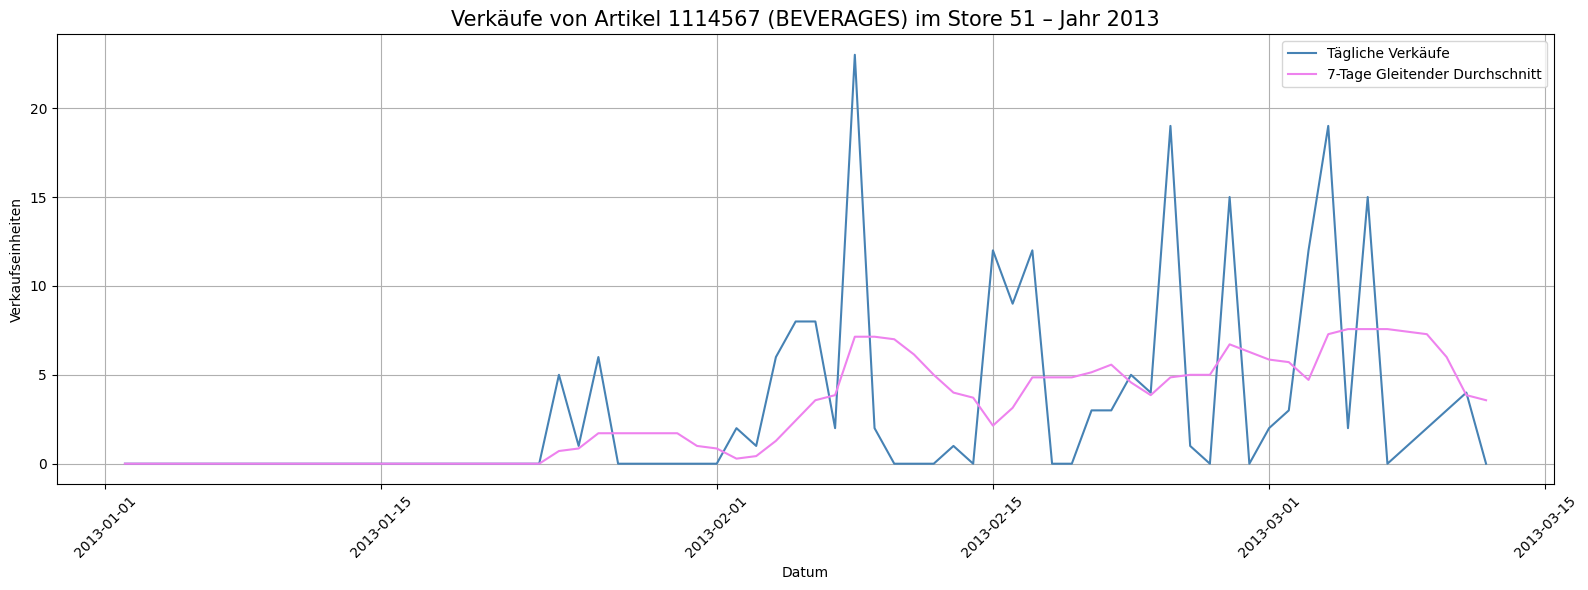

In [82]:
import matplotlib.pyplot as plt

#Meistverkauftes Produkt & Store
top_item = df_guayas_full['item_nbr'].value_counts().idxmax()
top_store = df_guayas_full['store_nbr'].value_counts().idxmax()
family_name = df_guayas_full[df_guayas_full['item_nbr'] == top_item]['family'].iloc[0]

#Daten vorbereiten (komplettes Jahr 2013)
ts_data = df_guayas_full[
    (df_guayas_full['item_nbr'] == top_item) &
    (df_guayas_full['store_nbr'] == top_store) &
    (df_guayas_full['date'].dt.year == 2013)
]

#Gruppieren nach Datum (Tagesumsätze)
sales_ts = ts_data.groupby('date')['unit_sales'].sum().sort_index()

#Gleitender Durchschnitt
rolling_avg = sales_ts.rolling(window=7, min_periods=1).mean()

#Plotten
plt.figure(figsize=(16, 6))
plt.plot(sales_ts.index, sales_ts.values, label='Tägliche Verkäufe', color='steelblue')
plt.plot(rolling_avg.index, rolling_avg.values, label='7-Tage Gleitender Durchschnitt', color='violet')

#Titel & Achsen
plt.title(f"Verkäufe von Artikel {top_item} ({family_name}) im Store {top_store} – Jahr 2013", fontsize=15)
plt.xlabel("Datum")
plt.ylabel("Verkaufseinheiten")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [83]:
#Finaler Datensatz speichern
final_path = f"{BASE_PATH}/guayas_prepared_final.csv"

#Speichern
df_guayas_full.to_csv(final_path, index=False)

print("Finaler Datensatz gespeichert unter:")
print(final_path)


Finaler Datensatz gespeichert unter:
/content/drive/MyDrive/Time-Series-Modeling-Project/retail_kaggle_data_raw/guayas_prepared_final.csv


In [122]:
# Git-Konfiguration (nur einmal nötig)
!git config --global user.email "hfouani@gmail.com"
!git config --global user.name "Hebifou"

# 📁 Sicherstellen, dass du im richtigen Ordner bist
%cd /content/retail_demand_analysis

# 📄 Notebook aus Google Drive kopieren (Pfad ggf. anpassen)
!cp /content/drive/MyDrive/Colab_Notebooks/EDA_Guayas_Vorbereitung.ipynb .

# 📌 Datei zum Git-Tracking hinzufügen
!git add EDA_Guayas_Vorbereitung.ipynb

# ✏️ Commit mit deiner finalen Nachricht (ohne 🚀)
!git commit --amend -m "Final version of EDA notebook for Guayas region"

# 🔐 Sicheres Pushen (mit force wegen --amend)
from getpass import getpass
token = getpass("Gib deinen GitHub Token ein (wird nicht angezeigt): ")
repo_url = f"https://{token}@github.com/Hebifou/retail_demand_analysis.git"

# 🚀 Push erzwingen (weil Commit ersetzt wurde)
!git push -f {repo_url}


On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean
Gib deinen GitHub Token ein (wird nicht angezeigt): ··········
Everything up-to-date
